In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/House Type Train'

Train_9G.zip


In [ ]:
# tmp = 

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/House_Room_Dataset')

Found 3341 files belonging to 5 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

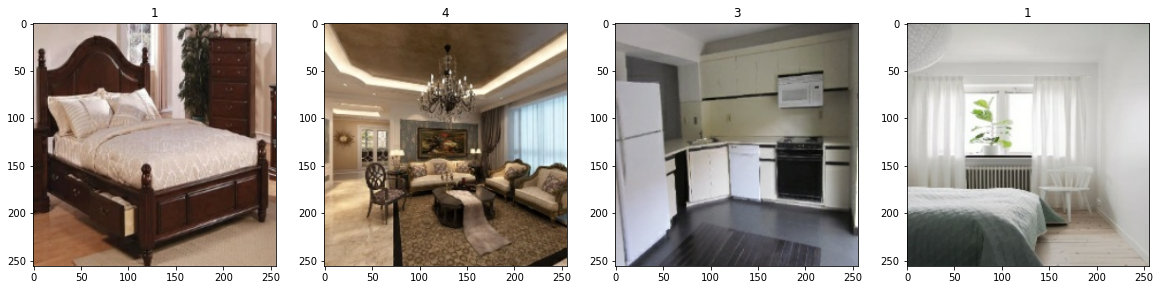

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.627451  , 0.5411765 , 0.4862745 ],
          [0.61151963, 0.5252451 , 0.47034314],
          [0.62671566, 0.535049  , 0.48553923],
          ...,
          [0.5872549 , 0.5240196 , 0.43970588],
          [0.5772059 , 0.5330882 , 0.47254902],
          [0.5803922 , 0.54901963, 0.49803922]],
 
         [[0.61789215, 0.53161764, 0.47671568],
          [0.60454965, 0.51827514, 0.46337315],
          [0.615962  , 0.52429533, 0.47478554],
          ...,
          [0.58406866, 0.52521443, 0.4430913 ],
          [0.5698376 , 0.52572   , 0.46518075],
          [0.55490196, 0.5235294 , 0.47254902]],
 
         [[0.6022059 , 0.5240196 , 0.46642157],
          [0.5960325 , 0.5112745 , 0.45586702],
          [0.60438114, 0.51271445, 0.46320465],
          ...,
          [0.56799936, 0.52009803, 0.44117647],
          [0.5612286 , 0.5236826 , 0.46634498],
          [0.57058823, 0.5392157 , 0.49362746]],
 
         ...,
 
         [[0.82843137, 0.78406864, 0.71593136],
          [0.81787

### Split Data

In [ ]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)

# def change_inputs(images, labels):
#   x = tf.image.resize(normalization_layer(images),[28, 28], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
#   return x, x

# normalized_data = train_data.map(change_inputs)

In [ ]:
# type(normalized_data.as_numpy_iterator())

In [ ]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# # Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# train_labels

In [ ]:
# type(train_images)

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NotFoundError: ignored

In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('data', output="output", seed=1337, ratio=(.6, 0.2, 0.2)) 

test_data = tf.keras.utils.image_dataset_from_directory('output/test')
test_data = test_data.map(lambda x,y: (x/255, y))
test_data

train_data = tf.keras.utils.image_dataset_from_directory('output/train')
train_data = train_data.map(lambda x,y: (x/255, y))
train_data

val_data = tf.keras.utils.image_dataset_from_directory('output/val')
val_data = val_data.map(lambda x,y: (x/255, y))
val_data

In [ ]:
# test_data = tf.keras.utils.image_dataset_from_directory('output/test')
# test_data = test_data.map(lambda x,y: (x/255, y))
# test_data

In [ ]:
# train_data = tf.keras.utils.image_dataset_from_directory('output/train')
# train_data = train_data.map(lambda x,y: (x/255, y))
# train_data

In [ ]:
# val_data = tf.keras.utils.image_dataset_from_directory('output/val')
# val_data = val_data.map(lambda x,y: (x/255, y))
# val_data

## Build Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

# history = model.fit(train_images, train_labels, epochs=10, 
#                     validation_data=(test_images, test_labels))
# history = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])
# history = model.fit(train_data, [[1], [2]], batch_size=32, epochs=10, validation_data=(val_data, [[1], [2]]))

### Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train_data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

### Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test_data.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


print(pre.result(), re.result(), acc.result())

# Working model

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/House_Room_Dataset', output='output', ratio=(.7, 0.2, 0.1)) 

Copying files: 3341 files [00:05, 570.33 files/s]


In [ ]:
def get_image_data(data_path, color_mode, image_size, seed = None, subset = None, validation_split = None):
    if subset:
        validation_split = 0.1
    
    raw_data_set = tf.keras.preprocessing.image_dataset_from_directory(
        data_path,
        color_mode='rgb',
        image_size=image_size,
        seed=seed,
        validation_split=validation_split, 
        subset=subset
    )
    
    raw_data_set.class_names.sort()
    
    return {
        "data": raw_data_set.cache().prefetch(
        buffer_size = tf.data.experimental.AUTOTUNE
        ),
        "classNames": raw_data_set.class_names
    }

In [ ]:
training_ds = get_image_data(
    'output/train',
    "grayscale",
    (256, 256),
    42,
    subset = "training"
)

validation_ds = get_image_data(
    'output/val',
    "grayscale",
    (256, 256),
    42,
    subset = "validation"
)

test_ds = get_image_data(
    'output/test',
    "grayscale",
    (256, 256)
)

Found 2671 files belonging to 5 classes.
Using 2404 files for training.
Found 1001 files belonging to 5 classes.
Using 100 files for validation.
Found 671 files belonging to 5 classes.


In [ ]:
equivalence_check = training_ds["classNames"] == validation_ds["classNames"]
assert_fail_message = "Training and Validation classes should match"
assert(equivalence_check), assert_fail_message
class_names = training_ds["classNames"]
number_classes = len(class_names)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# input
input = Input(shape =(256, 256, 1))

weight_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
bias_initializer=tf.keras.initializers.Zeros()

# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)


# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# Fully connected layers

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(units = 4096, activation ='relu', kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
x = Dropout(0.5)(x)
x = Dense(units = 4096, activation ='relu', kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)

output = Dense(units = 512, activation ='softmax')(x)
output = Dense(units = 5, activation ='softmax')(x)

# creating the model

model = Model (inputs=input, outputs =output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

In [ ]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dense(5, activation='sigmoid'))

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(5))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer='adam',
    loss=loss,
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
history = model.fit(
    training_ds["data"],
    validation_data = validation_ds["data"],
    epochs = 10,
    callbacks = [callback]
)

Epoch 1/10
66/66 [==============================] - 5s 73ms/step - loss: 95.3554 - accuracy: 0.2544 - val_loss: 1.5841 - val_accuracy: 0.3300
Epoch 2/10
66/66 [==============================] - 4s 61ms/step - loss: 1.5439 - accuracy: 0.3153 - val_loss: 1.5568 - val_accuracy: 0.3400
Epoch 3/10
66/66 [==============================] - 4s 61ms/step - loss: 1.4229 - accuracy: 0.4037 - val_loss: 1.5682 - val_accuracy: 0.3200
Epoch 4/10
66/66 [==============================] - 4s 61ms/step - loss: 1.3405 - accuracy: 0.4513 - val_loss: 1.7079 - val_accuracy: 0.3700
Epoch 5/10
66/66 [==============================] - 4s 61ms/step - loss: 1.1752 - accuracy: 0.5040 - val_loss: 1.6270 - val_accuracy: 0.3800


In [ ]:
# Model evaluation
model.evaluate(test_ds["data"])

21/21 [==============================] - 1s 27ms/step - loss: 1.5728 - accuracy: 0.3010


[1.5727853775024414, 0.30104321241378784]

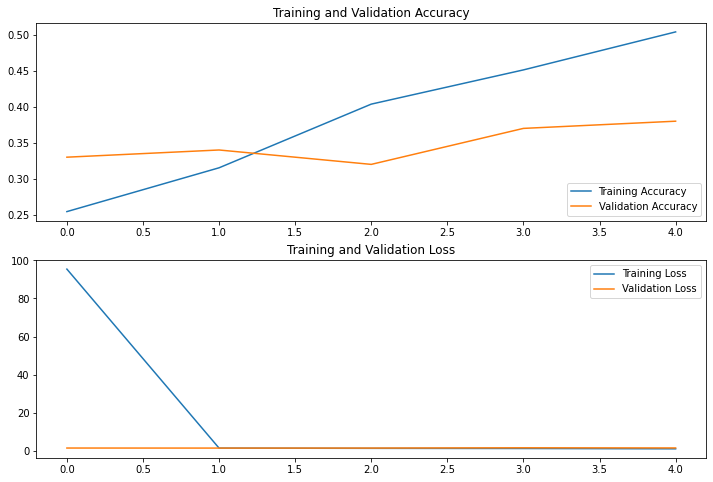

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp

def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);

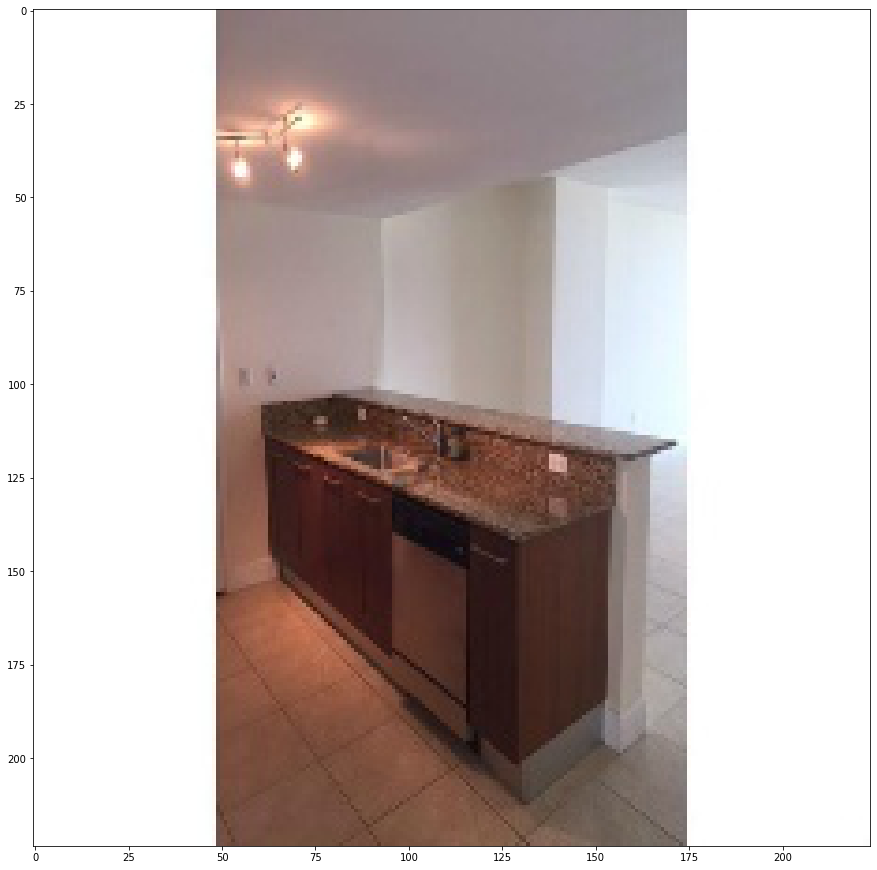

In [ ]:
import cv2
import glob
from skimage.io import imread, imshow

glob_dir = 'output/train/Kitchen/*.jpg'
train_images = glob.glob(glob_dir)
train = load_images(train_images)

paths = [file for file in glob.glob(glob_dir)]

# Quick test
plot_any(train[:1])

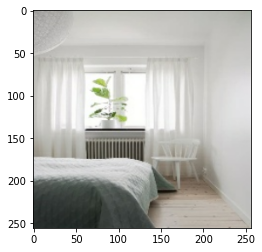

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
test_ds['data']

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
yhat = model.predict(test_ds['data'])
yhat

21/21 [==============================] - 1s 25ms/step


array([[  2.8145459,   4.6593795,   3.4039237, ...,  -5.5430527,
         -7.216443 ,  -6.217545 ],
       [  4.4241347,   5.5656476,   5.179144 , ...,  -8.331305 ,
        -10.363019 ,  -8.776389 ],
       [ 10.858264 ,  10.884816 ,   9.885294 , ..., -12.400756 ,
        -16.093088 , -13.1633415],
       ...,
       [  4.6561975,   6.4244323,   5.185663 , ...,  -8.57599  ,
        -11.15322  ,  -9.397326 ],
       [  3.4384468,   5.982434 ,   3.9944947, ...,  -6.096051 ,
         -8.510336 ,  -7.5996943],
       [ 13.773126 ,   5.9354415,   4.989093 , ..., -15.818228 ,
        -13.382899 , -12.154666 ]], dtype=float32)

## VVG

DEVICES : 
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Using:
	• Python version: 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
	• TensorFlow version: 2.9.2
	• tf.keras version: 2.9.0
	• Running on GPU
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                           

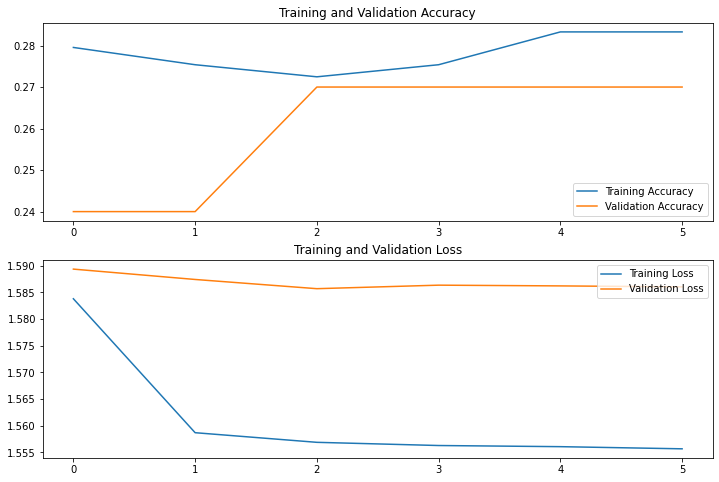

End of Training


In [ ]:
# import necessary layers  
from tensorflow.keras.layers import Input, Conv2D , Dropout, MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import matplotlib.pyplot as plt
import sys
from tensorflow.keras.callbacks import CSVLogger


MODEL_FNAME = "trained_model.h5"
base_dir = "output"
tmp_model_name = "tmp.h5"
INPUT_SIZE = 256
BATCH_SIZE = 16


physical_devices = tf.config.list_physical_devices()
print("DEVICES : \n", physical_devices)


print('Using:')
print('\t\u2022 Python version:',sys.version)
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

count = 0
previous_acc = 0


if not os.path.exists(MODEL_FNAME):
    
    """ Create VGG Model"""
    
    # input
    input = Input(shape =(INPUT_SIZE,INPUT_SIZE,3))
    
    weight_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
    bias_initializer=tf.keras.initializers.Zeros()
    
    # 1st Conv Block
    
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(input)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
    
    # 2nd Conv Block
    
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = MaxPool2D(pool_size =5, strides =5, padding ='same')(x)
    
    # 3rd Conv block
    
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = MaxPool2D(pool_size =5, strides =5, padding ='same')(x)
    
    # 4th Conv block
    
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = MaxPool2D(pool_size =5, strides =5, padding ='same')(x)
    
    
    # 5th Conv block
    
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = MaxPool2D(pool_size =5, strides =5, padding ='same')(x)
    
    # Fully connected layers
    
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 4096, activation ='relu', kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 4096, activation ='relu', kernel_initializer=weight_initializer,kernel_regularizer=l2(0.00005),bias_initializer=bias_initializer)(x)
    
    output = Dense(units = 5, activation ='softmax')(x)
    
    # creating the model
    
    model = Model (inputs=input, outputs =output)
    
    m = model
    m.save(tmp_model_name)
    del m
    tf.keras.backend.clear_session()
    
    
    model.summary()
    
    """ Prepare the Dataset for Training"""
    
    
    train_dir = os.path.join(base_dir, 'train')
    val_dir = os.path.join(base_dir, 'val')
 
    
    train_batches = ImageDataGenerator(rescale = 1 / 255.).flow_from_directory(train_dir,
                                                         target_size=(INPUT_SIZE,INPUT_SIZE),
                                                         shuffle=True,
                                                         seed=42,
                                                         batch_size=BATCH_SIZE)

    val_batches = ImageDataGenerator(rescale = 1 / 255.).flow_from_directory(val_dir,
                                                         target_size=(INPUT_SIZE,INPUT_SIZE),
                                                         shuffle=True,
                                                         seed=42,
                                                         batch_size=BATCH_SIZE)
    
    """ Train """
    
    class CustomLearningRateScheduler(tf.keras.callbacks.Callback):
        def __init__(self, schedule):
            super(CustomLearningRateScheduler, self).__init__()
            self.schedule = schedule
        

        def on_epoch_end(self, epoch, logs=None):
            if not hasattr(self.model.optimizer, "lr"):
                raise ValueError('Optimizer must have a "lr" attribute.')
            # Get the current learning rate from model's optimizer.
            lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
            # Call schedule function to get the scheduled learning rate.
            # keys = list(logs.keys())
            # print("keys",keys)
            val_acc = logs.get("val_binary_accuracy")
            scheduled_lr = self.schedule(lr, val_acc)
            # Set the value back to the optimizer before this epoch starts
            tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
          
    def learning_rate_scheduler(lr, val_acc):
        global count
        global previous_acc
      
        if val_acc == previous_acc:
          #  print("acc ", val_acc, "previous acc ", previous_acc)
            count += 1
        else:
            count = 0
        
        if count >= 5:
            print("acc is the same for 10 epoch, learnin rate decreased by /10")
            count = 0
            lr /= 10
            print("new learning rate:", lr)
            
        previous_acc = val_acc   
        return lr
    
    #compile the model by determining loss function Binary Cross Entropy, optimizer as SGD
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )
       
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
        
    checkpointer = ModelCheckpoint(filepath=MODEL_FNAME, verbose=1, save_best_only=True)
    
    csv_logger = CSVLogger('log.csv', append=True, separator=' ')
    
    callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
        baseline=None, restore_best_weights=True
    )
    history = model.fit(
        training_ds["data"],
        validation_data = validation_ds["data"],
        epochs = 10,
        callbacks = [callback]
    )
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    print("End of Training")

tf.keras.backend.clear_session()

## Transfer learning

Number of layers in the base model:  19
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPool

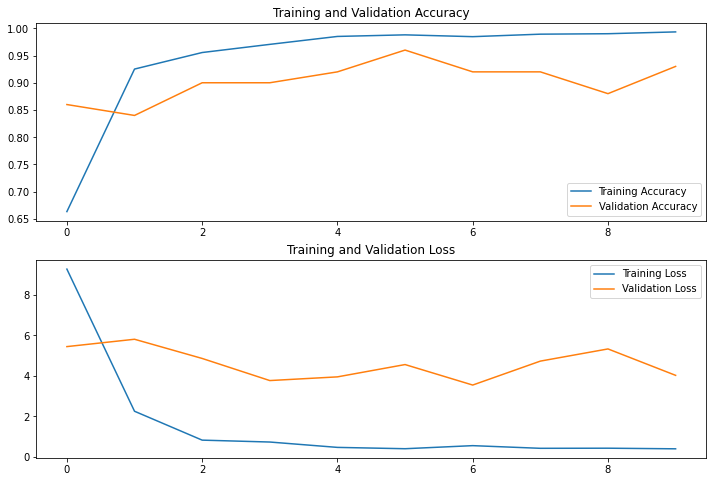

End of Training


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import matplotlib.pyplot as plt
import sys
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.applications import vgg16, imagenet_utils
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


MODEL_FNAME = "pretrained_model.h5"
tmp_model_name = "tmp.h5"
base_dir = "dataset"
INPUT_SIZE = 256
BATCH_SIZE = 16

count = 0
previous_acc = 0


base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(INPUT_SIZE,INPUT_SIZE,3))

m = base_model
m.save(tmp_model_name)
del m
tf.keras.backend.clear_session()

print("Number of layers in the base model: ", len(base_model.layers))

base_model.trainable = False

last_output = base_model.output

x = Flatten()(last_output)
x = Dense(5, activation='softmax')(x)

model = Model(inputs=[base_model.input], outputs=[x])

model.summary()

""" Prepare the Dataset for Training"""

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

""" Train """

class CustomLearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, schedule):
        super(CustomLearningRateScheduler, self).__init__()
        self.schedule = schedule
    

    def on_epoch_end(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        # keys = list(logs.keys())
        # print("keys",keys)
        val_acc = logs.get("val_binary_accuracy")
        scheduled_lr = self.schedule(lr, val_acc)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
      
def learning_rate_scheduler(lr, val_acc):
    global count
    global previous_acc
  
    if val_acc <= previous_acc:
      #  print("acc ", val_acc, "previous acc ", previous_acc)
        count += 1
    else:
        previous_acc = val_acc   
        count = 0
    
    if count >= 5:
        print("acc is the same for 10 epoch, learnin rate decreased by /10")
        count = 0
        lr /= 10
        print("new learning rate:", lr)
        
  
    return lr

#compile the model by determining loss function Binary Cross Entropy, optimizer as SGD
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer='adam',
    loss=loss,
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    
checkpointer = ModelCheckpoint(filepath=MODEL_FNAME, verbose=1, save_best_only=True)

csv_logger = CSVLogger('log.csv', append=True, separator=' ')


callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
history = model.fit(
    training_ds["data"],
    validation_data = validation_ds["data"],
    epochs = 10,
    callbacks = [callback]
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("End of Training")   

tf.keras.backend.clear_session()

In [ ]:
# Evaluate on test data
scores = model.evaluate(test_ds['data'])
print("metric names", model.metrics_names)

print(model.metrics_names[0], scores[0])
print(model.metrics_names[1], scores[1])

21/21 [==============================] - 6s 252ms/step - loss: 11.5216 - accuracy: 0.7973
metric names ['loss', 'accuracy']
loss 11.521602630615234
accuracy 0.7973174452781677
